In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import os
import sys
# Needed for the model class to work inside a Notebook.
os.environ["COBAYA_NOMPI"] = "True"

from cobaya.yaml          import yaml_load_file
from cobaya.samplers.mcmc import plot_progress
from cobaya.model         import get_model
from cobaya.samplers.mcmc import plot_progress
#
from getdist.mcsamples    import MCSamplesFromCobaya
from getdist.mcsamples    import loadMCSamples
import getdist.plots      as     gdplt
#
import os

In [9]:
info = yaml_load_file("yaml/recsym_cubic_xiells_am.yaml")
print(info['params'].keys())
print(info['output'])

dict_keys(['apar', 'aperp', 'B1_bao', 'F_bao'])
chains_am/recsym_cubic_xiells_am


In [10]:
import sys
sys.path.append('./lss_likelihood/')

In [11]:
model= get_model(info)
lik = model.likelihood['bao_zeldovich_likelihood_am.ZeldovichBAOLikelihood']

[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'stop_on_error']


In [13]:
params = {'apar': 1.0, 'aperp': 1.0, 'B1_bao': 1.1453427999999999, 'F_bao': 0.77740741}

model.logposterior(params)
bf_obs = lik.get_best_fit()

In [14]:
rdats = lik.xdat
xi0dat = lik.y0dat
xi2dat = lik.y2dat

(-10.0, 80.0)

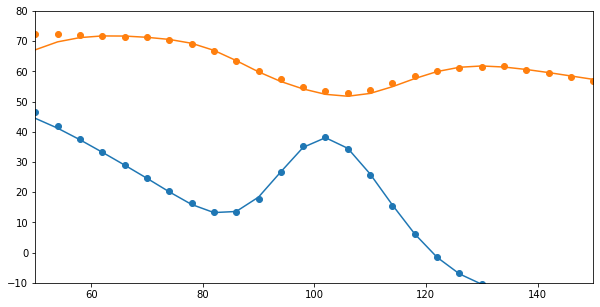

In [15]:
plt.figure(figsize=(10,5))

plt.plot(rdats, rdats**2 * xi0dat, 'C0o')
plt.plot(rdats, -rdats**2 * xi2dat, 'C1o')


plt.plot(rdats, rdats**2 * bf_obs[:50])
plt.plot(rdats, -rdats**2 * bf_obs[50:])


plt.xlim(50,150)
plt.ylim(-10,80)

In [16]:
# Now add in baryon contribution
template_dbc = np.loadtxt('fake_data/linear_template_deltabc.txt')

In [21]:
from spherical_bessel_transform import SphericalBesselTransform as SBT
from scipy.interpolate import interp1d

kint = np.logspace(-5, 2, 2000)
sphr = SBT(kint,L=5,fourier=True,low_ring=False)

In [22]:
template_dbc.shape

(3, 2000)

In [26]:
damping = np.exp(-(kint/3)**2)

p0t = interp1d(template_dbc[0,:], template_dbc[1,:], kind='cubic', bounds_error=False, fill_value=0)(kint)
p2t = interp1d(template_dbc[0,:], template_dbc[2,:], kind='cubic', bounds_error=False, fill_value=0)(kint)
        
rr0, xi0t = sphr.sph(0,p0t * damping)
rr2, xi2t = sphr.sph(2,p2t * damping); xi2t *= -1
xi4t = 0 * rr0 # no hexadecapole to speed things up

tt = np.array([rr0,xi0t,xi2t,xi4t]).T

In [35]:
tt_obs = lik.bao_observe(tt)

In [36]:
tt_obs.shape

(100,)

(-10.0, 80.0)

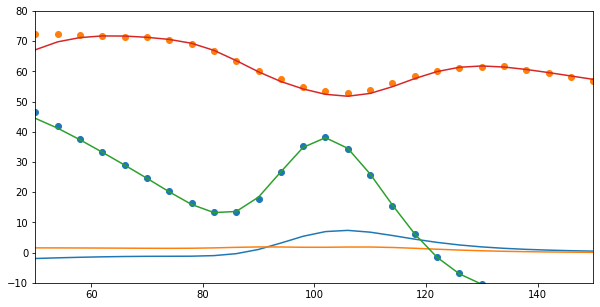

In [38]:
plt.figure(figsize=(10,5))



plt.plot(rdats, -5*rdats**2 * tt_obs[:50])
plt.plot(rdats, -5*rdats**2 * tt_obs[50:])

plt.plot(rdats, rdats**2 * xi0dat, 'C0o')
plt.plot(rdats, -rdats**2 * xi2dat, 'C1o')


plt.plot(rdats, rdats**2 * bf_obs[:50])
plt.plot(rdats, -rdats**2 * bf_obs[50:])


plt.xlim(50,150)
plt.ylim(-10,80)

(-10.0, 80.0)

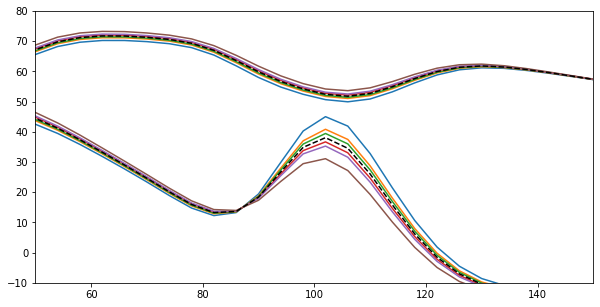

In [47]:
plt.figure(figsize=(10,5))

for ii, b in enumerate([-5.0, -2.0, -1.0, 1.0, 2.0, 5.0]):
    
    obs = bf_obs + tt_obs * b
    
    plt.plot(rdats, rdats**2 * obs[:50], 'C'+str(ii))
    plt.plot(rdats, -rdats**2 * obs[50:],  'C'+str(ii))
    
    #np.savetxt('fake_data/lrg_xiells_zeldovich_damping_deltabc_%.1f.txt'%(b), np.array([rdats, obs[:50], obs[50:]]).T)

obs = bf_obs + tt_obs * 0
    
plt.plot(rdats, rdats**2 * obs[:50], 'k--')
plt.plot(rdats, -rdats**2 * obs[50:],'k--')    

plt.xlim(50,150)
plt.ylim(-10,80)